## **Praktikum Pengolahan Sinyal Digital**



---


* Nama:Rifko Satrio Rahmadani
* NIM:231344057
* Kelas: 2B-TNK


## Modul_8_Filter_Domain_Waktu

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import signal as sgn
import matplotlib
import matplotlib.pyplot as plt

### Pendahuluan.
Sinyal pada umumnya mengandung derau. Salah satu derau yg dapat ditemui adalah derau yg
bersifat pulsa secara periodik. Percobaan kali ini akan meninjau kemampuan filter digital
untuk meredam derau semacam ini.

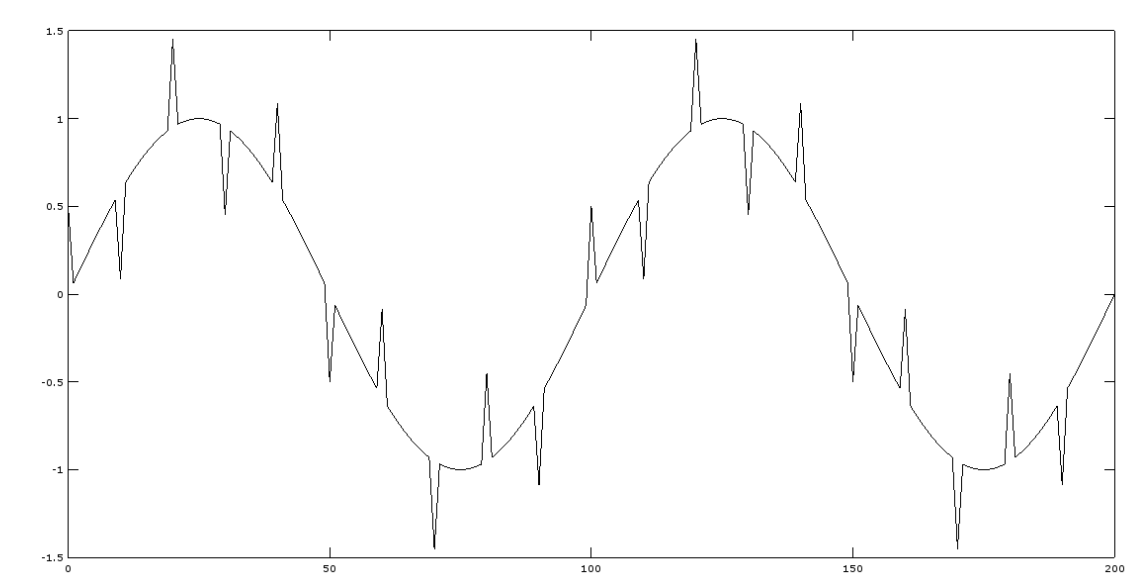

Ambil suatu data pengukuran sebanyak 200 titik pengukuran. Pengukuran dapat berupa:
- Pengukuran temperatur dengan menggunakan termometer, objek bisa berupa air panas
- Pengukuran intensitas cahaya dengan menggunakan aplikasi lumen meter, objek yang diukur berupa cahaya ambient didalam ruangan dengan adanya perubahan cahaya menggunakan senter.
- Pengukuran intensitas bunyi dengan menggunakan aplikasi decibel meter
- Pengukuran arus, tegangan, atau hambatan dengan multimeter.

> *Berikan penjelasan data yang diambil*

Pada data pengukuran sebanyak 200 titik, pengukuran yang diambil yaitu Pengukuran intesitas bunyi dengan menggunakan aplikasi decibel meter yang tersedia di Play Store.

engambilan data dilakukan di Lab Telematika 2 saat kegiatan praktikum berlangsung. Data diukur dalam satuan desibel (dB), Berikut adalah data intensitas bunyi yang diperoleh:

72,69,74,70,68,75,71,73,77,70,66,72,68,71,74,69,73,67,75,71,
70,69,68,74,66,73,72,71,70,76,67,74,68,72,73,70,66,69,75,72,
71,74,68,67,70,69,72,71,73,74,69,70,66,75,72,74,68,70,71,73,
69,72,68,67,74,70,69,75,72,70,71,66,74,68,73,70,71,69,68,73,
70,75,69,66,74,72,71,73,70,67,72,74,69,68,75,70,71,73,68,72,
74,70,67,75,69,72,70,68,74,71,73,66,69,74,72,70,71,67,75,70,
69,73,68,72,70,74,67,71,69,73,70,68,75,72,69,70,67,73,72,71,
70,68,74,67,69,73,70,75,68,72,70,71,74,67,69,73,70,72,71,68,
75,70,69,74,67,72,70,71,73,68,74,70,69,72,68,75,70,73,71,67,
70,72,74,69,68,73,71,66,75,70,72,68,74,70,71,73,67,69,74,70.

### Percobaan Filter Moving Average

Deklarasikan data Anda sebagai sebuah variabel. Lalu plot menjadi sebuah sinyal dengan menggunakan ```plt.plot``` sepanjang durasi pengambilan data

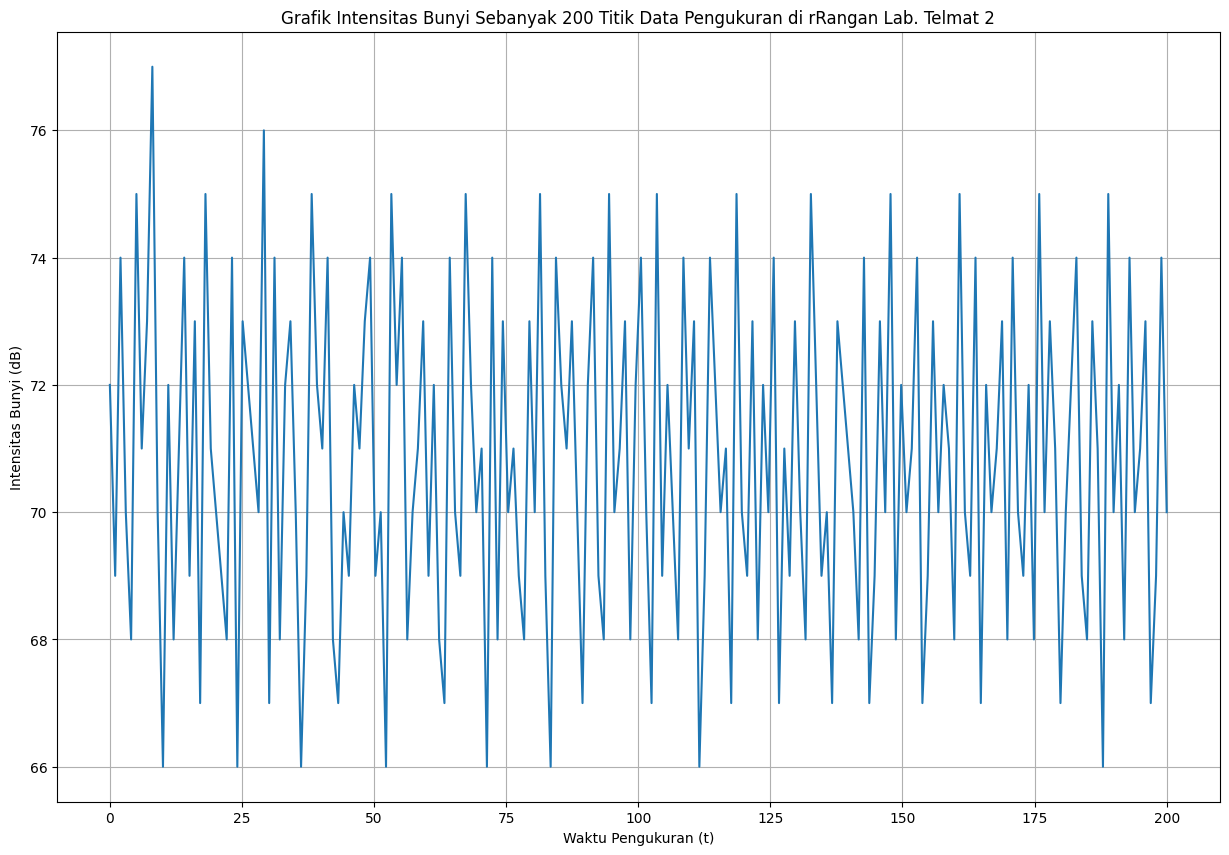

In [ ]:
#Tuliskan program disini
data_ukur=[72,69,74,70,68,75,71,73,77,70,66,72,68,71,74,69,73,67,75,71, 70,69,68,74,66,73,72,71,70,76,67,74,68,72,73,70,66,69,75,72, 71,74,68,67,70,69,72,71,73,74,69,70,66,75,72,74,68,70,71,73, 69,72,68,67,74,70,69,75,72,70,71,66,74,68,73,70,71,69,68,73, 70,75,69,66,74,72,71,73,70,67,72,74,69,68,75,70,71,73,68,72, 74,70,67,75,69,72,70,68,74,71,73,66,69,74,72,70,71,67,75,70, 69,73,68,72,70,74,67,71,69,73,70,68,75,72,69,70,67,73,72,71, 70,68,74,67,69,73,70,75,68,72,70,71,74,67,69,73,70,72,71,68, 75,70,69,74,67,72,70,71,73,68,74,70,69,72,68,75,70,73,71,67, 70,72,74,69,68,73,71,66,75,70,72,68,74,70,71,73,67,69,74,70]
dur = 200                      #3 menit lebih
plt.figure(figsize=(15,10))
waktu = np.linspace(0, dur, len(data_ukur))
plt.plot(waktu, data_ukur)
plt.xlabel("Waktu Pengukuran (t)")
plt.ylabel("Intensitas Bunyi (dB)")
plt.title("Grafik Intensitas Bunyi Sebanyak 200 Titik Data Pengukuran di rRangan Lab. Telmat 2")
plt.grid()
plt.show()

### Lewatkan sinyal di atas melalui filter Moving Average 3 Elemen Berikut
$$y[n]=1/3 ( x[n] +  x[n-1] +x[n-2])$$

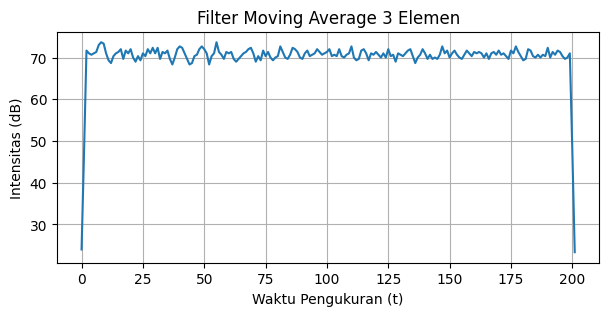

In [ ]:
#Tuliskan program disini
h_filter = [1/3, 1/3, 1/3] # Filter moving average 3 Elemen
data_ukur = [72,69,74,70,68,75,71,73,77,70,66,72,68,71,74,69,73,67,75,71, 70,69,68,74,66,73,72,71,70,76,67,74,68,72,73,70,66,69,75,72,71,74,68,67,70,69,72,71,73,74,69,70,66,75,72,74,68,70,71,73, 69,72,68,67,74,70,69,75,72,70,71,66,74,68,73,70,71,69,68,73, 70,75,69,66,74,72,71,73,70,67,72,74,69,68,75,70,71,73,68,72, 74,70,67,75,69,72,70,68,74,71,73,66,69,74,72,70,71,67,75,70, 69,73,68,72,70,74,67,71,69,73,70,68,75,72,69,70,67,73,72,71, 70,68,74,67,69,73,70,75,68,72,70,71,74,67,69,73,70,72,71,68, 75,70,69,74,67,72,70,71,73,68,74,70,69,72,68,75,70,73,71,67, 70,72,74,69,68,73,71,66,75,70,72,68,74,70,71,73,67,69,74,70]  # (sinyal dari sebelumnya)
data_terfilter = np.convolve(h_filter, data_ukur) # Terapkan filter dengan konvolusi

# Plot hasil
plt.figure(figsize=(7, 3))
plt.xlabel("Waktu Pengukuran (t)")
plt.ylabel("Intensitas (dB)")
plt.title("Filter Moving Average 3 Elemen")
plt.grid()
plt.plot(data_terfilter)
plt.show()


> *Berikan penjelasan akhir dari hasil percobaan disini*

Filter Moving Average 3 elemen tersebut terbukti cukup efektif untuk mengurangi derau pulsa pada sinyal pengukuran intensitas bunyi, tanpa menghilangkan informasi utama dari sinyal tersebut.

Setelah diterapkan filter, sinyal menjadi lebih halus dan lebih stabil. Meskipun nilai-nilai yang naik-turun secara drastis masih ada sedikit, tapi dampaknya lebih kecil dibanding sinyal aslinya.Dengan filter ini, saya bisa lebih mudah menganalisis kurvaanya dari data yang awalnya terganggu oleh noise.

Contoh:

sebuah data pengukuran intensitas Bunyi (dB):

72,69,74,100,68,75,71

Di tengah ada lonjakan dari 74 -> 100 -> 68

Tanpa filter:
Grafik langsung naik tajam di titik ke-4.

Dengan filter:
Mengambil rata-rata 3 titik di tiap langkah:
Titik ke-4 akan jadi: (704+ 100 + 68)/3 = 80

Jadi lonjakannya tidak akan mencapai 100, tapi “tertahan” oleh yang ada di sekitarnya menjadi kelihatan naiknya lebih pelan

### Lewatkan sinyal di atas melalui filter Moving Average 7 Elemen

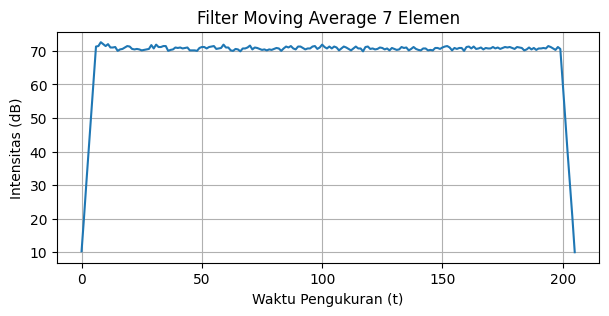

In [ ]:
#Tuliskan program disini
h_filter = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7] # Filter moving average 7 Elemen
data_ukur = [72,69,74,70,68,75,71,73,77,70,66,72,68,71,74,69,73,67,75,71, 70,69,68,74,66,73,72,71,70,76,67,74,68,72,73,70,66,69,75,72, 71,74,68,67,70,69,72,71,73,74,69,70,66,75,72,74,68,70,71,73, 69,72,68,67,74,70,69,75,72,70,71,66,74,68,73,70,71,69,68,73, 70,75,69,66,74,72,71,73,70,67,72,74,69,68,75,70,71,73,68,72, 74,70,67,75,69,72,70,68,74,71,73,66,69,74,72,70,71,67,75,70, 69,73,68,72,70,74,67,71,69,73,70,68,75,72,69,70,67,73,72,71, 70,68,74,67,69,73,70,75,68,72,70,71,74,67,69,73,70,72,71,68, 75,70,69,74,67,72,70,71,73,68,74,70,69,72,68,75,70,73,71,67, 70,72,74,69,68,73,71,66,75,70,72,68,74,70,71,73,67,69,74,70]  # (sinyal dari sebelumnya)
data_terfilter = np.convolve(h_filter, data_ukur) # Terapkan filter dengan konvolusi

# Plot hasil
plt.figure(figsize=(7, 3))
plt.xlabel("Waktu Pengukuran (t)")
plt.ylabel("Intensitas (dB)")
plt.title("Filter Moving Average 7 Elemen")
plt.grid()
plt.plot(data_terfilter)
plt.show()

> *Berikan penjelasan akhir dari hasil percobaan disini*

Filter Moving Average 7 elemen bekerja dengan baik untuk mengurangi derau yaitu gangguan kecil yang membuat sinyal tidak stabil dan memberikan gambaran yang lebih stabil terhadap intensitas bunyi yang diukur.

Setelah diterapkan filter 7 elemen, sinyal menjadi lebih halus dibandingkan saat menggunakan filter 3 elemen, karena semakin banyak elemen dalam moving average Maka, semakin banyak derau yang dihaluskan. Meskipun perubahan data jadi lebih lambat terlihat (karena dirata-ratakan), namun informasi utama dari sinyal tetap terjaga, dan noise acak bisa dikurangi lebih baik dari filter elemen 3.


### Percobaan Median Filter

Tambahkan sinyal hasil pengukuran Anda dengan noise pulsa dibawah

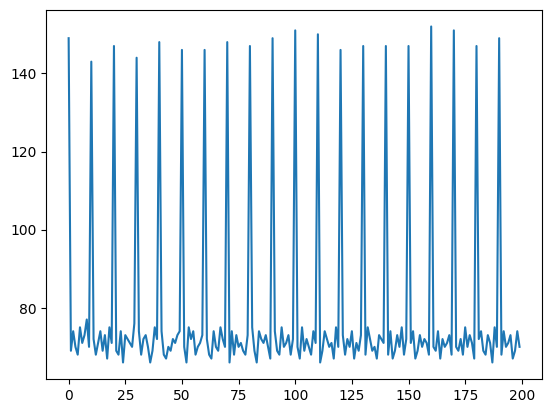

In [ ]:
noise_arr= np.zeros(len(data_ukur))                #sesuaikan dengan jumlah titik pengambilan data
interval = 10
amplitudo = 38.5         #sesuaikan dengan 50 persen dari nilai maksimal pengukuran, data pengukuran tertinggi di bagi 2  hasilnya sebagai amplitudo
for index in range(len(noise_arr)):
    if index % interval == 0:
        noise_arr[index] = amplitudo

data_ukur_baru=data_ukur+noise_arr
plt.plot(data_ukur_baru)
plt.show()

##Mulai tuliskan program dibawah

Lewatkan sinyal di atas melalui filter Moving Average 5 elemen

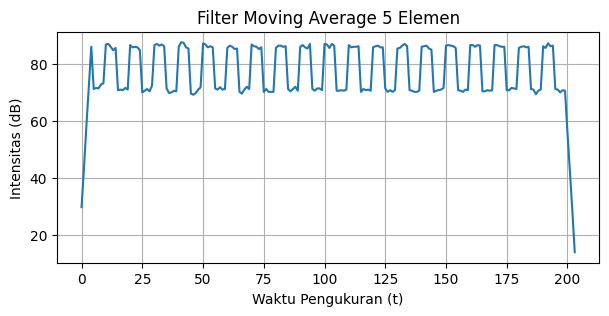

In [ ]:
#Tuliskan program disini
h_filter = [1/5, 1/5, 1/5, 1/5, 1/5] # Filter moving average 5 Elemen
data_ukur = data_ukur_baru
data_terfilter5 = np.convolve(h_filter, data_ukur) # Terapkan filter dengan konvolusi

# Plot hasil
plt.figure(figsize=(7, 3))
plt.xlabel("Waktu Pengukuran (t)")
plt.ylabel("Intensitas (dB)")
plt.title("Filter Moving Average 5 Elemen")
plt.plot(data_terfilter5)
plt.grid()
plt.show()

 Lalu lewatkan sinyal di atas melalui filter Median 5 elemen. Filter Median adalah filter yg
mengurutkan elemen-elemennya dan mengambil urutan yg ditengah sebagai nilai hasil
filter. Lalu ubah panjang filternya dengan 7 elemen. Filter mana yg memberikan hasil
paling baik? Mengapa?

[74. 70. 70. 70. 71. 73. 73. 73. 77. 72. 72. 71. 71. 71. 73. 69. 73. 71.
 75. 71. 69. 69. 68. 73. 72. 72. 71. 71. 76. 76. 74. 72. 72. 72. 70. 69.
 69. 72. 75. 74. 74. 68. 68. 69. 70. 71. 72. 73. 74. 74. 70. 70. 72. 74.
 72. 70. 70. 71. 73. 73. 72. 68. 68. 70. 70. 70. 72. 72. 72. 70. 74. 68.
 73. 70. 71. 70. 69. 69. 73. 75. 75. 69. 69. 72. 72. 72. 71. 70. 70. 74.
 74. 69. 69. 70. 71. 71. 71. 72. 72. 72. 70. 70. 69. 72. 70. 70. 70. 71.
 74. 71. 69. 69. 72. 72. 71. 70. 71. 70. 75. 73. 73. 72. 70. 72. 70. 71.
 69. 71. 73. 73. 75. 72. 72. 70. 69. 70. 72. 72. 72. 71. 74. 68. 69. 69.
 70. 73. 70. 72. 72. 72. 74. 71. 69. 69. 70. 72. 71. 71. 71. 70. 70. 70.
 69. 72. 70. 71. 71. 71. 73. 70. 70. 70. 69. 72. 70. 73. 71. 71. 71. 72.
 74. 72. 69. 69. 71. 71. 71. 70. 75. 70. 74. 70. 71. 71. 71. 69. 69.]


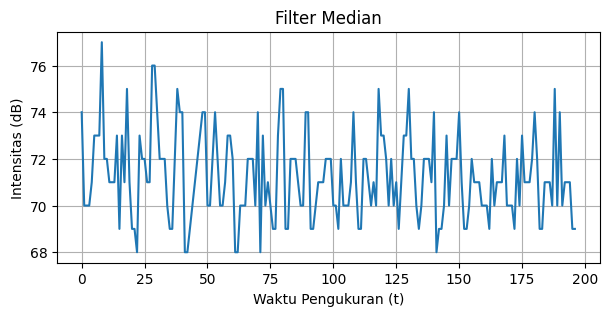

In [ ]:
#Tuliskan program disini

import numpy as np
panjang_data=len(data_ukur_baru)
n_filter_median=3
new_data=np.zeros(panjang_data-n_filter_median)

for n in range(panjang_data):
    if n-n_filter_median>=0:
        median= np.median(data_ukur_baru[n-n_filter_median:n])
        new_data[n-n_filter_median]=median

plt.figure(figsize=(7, 3))
plt.xlabel("Waktu Pengukuran (t)")
plt.ylabel("Intensitas (dB)")
plt.title("Filter Median")
print(new_data)
plt.plot(new_data)
plt.grid()



Banding hasil filter Moving Average dan Median secara umum. Filter mana yg
memberikan hasil yg lebih baik untuk jenis derau di atas? Tuliskan jawabannya pada
laporan saudara dan juga programnya.

> *Berikan penjelasan akhir dari hasil percobaan disini*

Secara umum, filter median lebih baik untuk mengatasi jenis derau tersebut, karena ia mengambil nilai tengah dari data pengukurannya, sehingga tidak mudah terpengaruh oleh lonjakan yang tidak wajar. Sementara itu, filter Moving Average cenderung membuat data lebih halus, karena ia menghitung rata-rata dari beberapa nilai data secara berurutan. tetapi bisa mengurangi detail penting dalam sinyal.

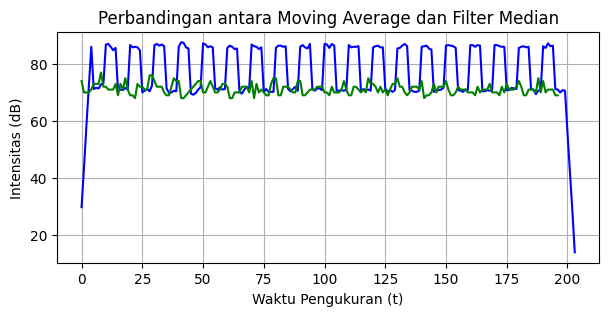

In [ ]:
# Menunjukkan hasil grafik kedua filter
plt.figure(figsize=(7, 3))
plt.plot(data_terfilter5, color='blue')
plt.plot(new_data, color='green')
plt.xlabel("Waktu Pengukuran (t)")
plt.ylabel("Intensitas (dB)")
plt.title("Perbandingan antara Moving Average dan Filter Median")

plt.grid()
plt.show()




---


© Prof. Hertog Nugroho, Teguh Ginanjar S.T., M.T, Muhammad Yusuf Fadhlan, SST., M.Sc & Nila Novitasari SST., MSc.

Politeknik Negeri Bandung (2025)